## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
# plt.style.use("ggplot")
sns.set_style("darkgrid")

## Load the Aggregated data

In [2]:
merged_df = pd.read_csv("../../clean_data/FinalData_for_Models.csv", index_col=0)

In [3]:
merged_df.head()

,num_pickups,num_passengers,missing_dt,temp,temp_min,temp_max,humidity,wind_speed,weather_main,weather_description,Passengers,Month,Hour,Day,holiday,precip_in,Avg_Delay_Arriving,Avg_Delay_Departing,Cancelled_Arriving_Flights,Cancelled_Departing_Flights
2014-01-01 00:00:00-05:00,107.0,210.0,False,269.27,267.59,270.93,80.0,3.0,clear,sky is clear,108.0,1,0,2,True,0.0,0.0,0.0,0.0,0.0
2014-01-01 01:00:00-05:00,34.0,45.0,False,268.90,267.04,270.93,80.0,2.0,clear,sky is clear,0.0,1,1,2,True,0.0,0.0,0.0,0.0,0.0
2014-01-01 02:00:00-05:00,34.0,70.0,False,268.48,266.48,270.37,57.0,3.0,clear,sky is clear,0.0,1,2,2,True,0.0,0.0,0.0,0.0,0.0
2014-01-01 03:00:00-05:00,12.0,18.0,False,268.33,265.93,270.37,80.0,3.0,clear,sky is clear,0.0,1,3,2,True,0.0,291.0,0.0,0.0,0.0
2014-01-01 04:00:00-05:00,25.0,37.0,False,268.10,265.37,270.37,80.0,3.0,clear,sky is clear,0.0,1,4,2,True,0.0,0.0,0.0,0.0,0.0


In [4]:
merged_df.index = pd.DatetimeIndex(merged_df.index).tz_localize("UTC").tz_convert("EST")

In [5]:
merged_df.head()

,num_pickups,num_passengers,missing_dt,temp,temp_min,temp_max,humidity,wind_speed,weather_main,weather_description,Passengers,Month,Hour,Day,holiday,precip_in,Avg_Delay_Arriving,Avg_Delay_Departing,Cancelled_Arriving_Flights,Cancelled_Departing_Flights
2014-01-01 00:00:00-05:00,107.0,210.0,False,269.27,267.59,270.93,80.0,3.0,clear,sky is clear,108.0,1,0,2,True,0.0,0.0,0.0,0.0,0.0
2014-01-01 01:00:00-05:00,34.0,45.0,False,268.90,267.04,270.93,80.0,2.0,clear,sky is clear,0.0,1,1,2,True,0.0,0.0,0.0,0.0,0.0
2014-01-01 02:00:00-05:00,34.0,70.0,False,268.48,266.48,270.37,57.0,3.0,clear,sky is clear,0.0,1,2,2,True,0.0,0.0,0.0,0.0,0.0
2014-01-01 03:00:00-05:00,12.0,18.0,False,268.33,265.93,270.37,80.0,3.0,clear,sky is clear,0.0,1,3,2,True,0.0,291.0,0.0,0.0,0.0
2014-01-01 04:00:00-05:00,25.0,37.0,False,268.10,265.37,270.37,80.0,3.0,clear,sky is clear,0.0,1,4,2,True,0.0,0.0,0.0,0.0,0.0


In [6]:
df = merged_df.groupby(["weather_main", "weather_description"]).agg({"num_pickups": "mean", "num_passengers": "mean"})

In [7]:
rain_df = df.loc["rain"]

In [19]:
rain_df = rain_df.iloc[[0, 1, 4], :]

In [20]:
rain_df.index

Index(['heavy intensity rain', 'light rain', 'moderate rain'], dtype='object', name='weather_description')

In [21]:
rain_df["num_passengers"]

weather_description
heavy intensity rain    584.590909
light rain              755.091752
moderate rain           671.980392
Name: num_passengers, dtype: float64

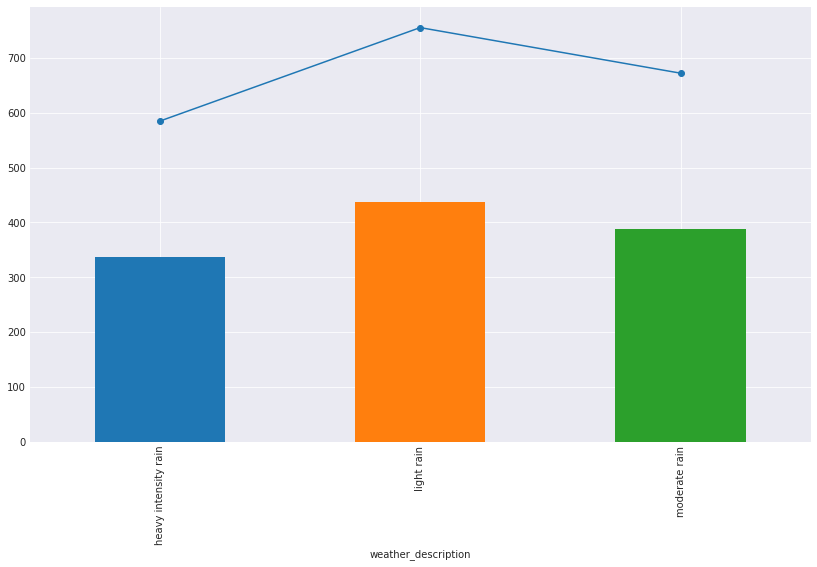

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
rain_df.num_pickups.plot(kind="bar", ax = ax)
ax.plot(range(3), rain_df["num_passengers"], marker = "o")

# plt.xticks(check.index, check["weather_description"])
# plt.xlabel("Rain Weather Types")
# plt.ylabel("Number of Passengers")
# plt.title("Effect of Rainy Weather on Average Taxi Pickups and Average Passenger Count per Hour")
# plt.legend()
# plt.show()

# sns.barplot(x = "weather_description", y = "pickup_count", data=check)


In [25]:
snow_df = df.loc["snow"]

In [26]:
snow_df

,num_pickups,num_passengers
weather_description,,
heavy snow,145.642857,244.571429
light snow,316.782857,550.341040
snow,427.666667,715.916667


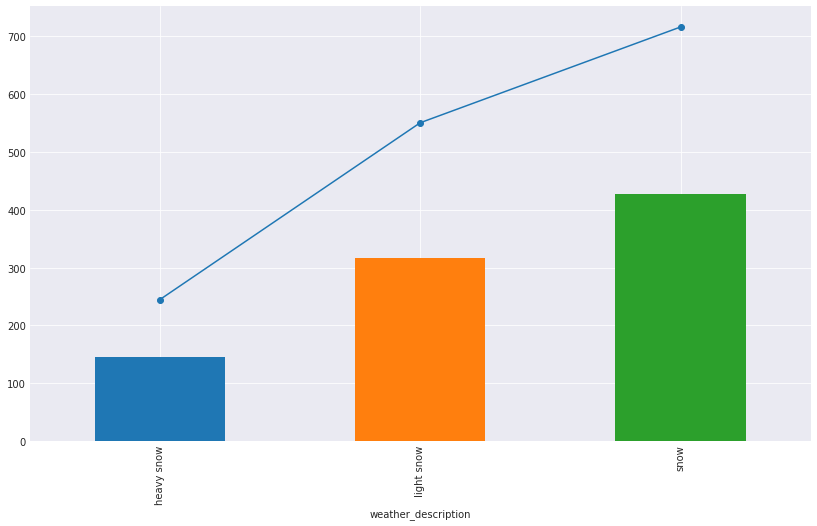

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
snow_df.num_pickups.plot(kind="bar", ax = ax)
ax.plot(range(3), snow_df["num_passengers"], marker = "o")

In [28]:
thunder_df = df.loc["thunderstorm"]

In [29]:
thunder_df

,num_pickups,num_passengers
weather_description,,
proximity thunderstorm,569.434783,983.652174
thunderstorm,473.285714,841.205882


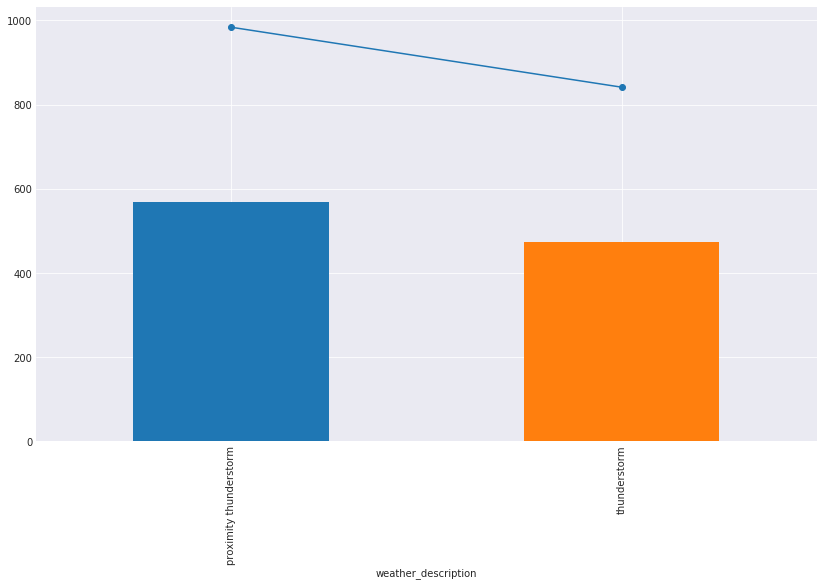

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
thunder_df.num_pickups.plot(kind="bar", ax = ax)
ax.plot(range(2), thunder_df["num_passengers"], marker = "o")

In [34]:
cloud_df = df.loc["clouds"]

In [39]:
cloud_df = cloud_df.loc[~cloud_df.index.str.contains(","), :]

In [41]:
cloud_df.head()

,num_pickups,num_passengers
weather_description,,
broken clouds,461.312630,796.488883
few clouds,446.883523,772.156303
overcast clouds,374.334799,644.819688
scattered clouds,476.484249,823.851322


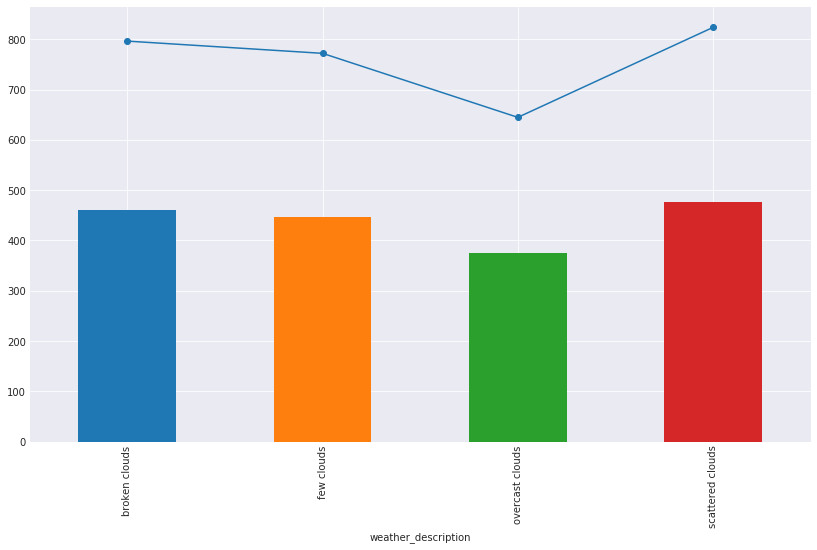

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
cloud_df.num_pickups.plot(kind="bar", ax = ax)
ax.plot(range(4), cloud_df["num_passengers"], marker = "o")